# LSTM 모델과 LSTM 사용을 위해 전처리된 데이터를 각각 로드하여 예측 테스트
- LSTM 모델은 /modeling/lstm/lstm_model.keras로 저장
- LSTM에 사용할 데이터는 data/lstm_data(lstm_X_data, lstm_y_data)로 저장

# 1. 데이터 로드

In [3]:
import pandas as pd

file_path = r'../../0_BeforeOrganizingFile/data'
X = pd.read_csv(file_path + 'lstm_X_data.csv', index_col=0).to_numpy()
y = pd.read_csv(file_path + 'lstm_y_data.csv', index_col=0).to_numpy()

FileNotFoundError: [Errno 2] No such file or directory: '../../0_BeforeOrganizingFile/datalstm_X_data.csv'

# 2.데이터 분할

In [17]:
import numpy as np
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

X_train = X[:-500]
y_train = y[:-500]

X_test = X[-500:]
y_test = y[-500:]

# 3. 모델 로드

In [18]:
from tensorflow import keras

model = keras.models.load_model("lstm_model.keras")

# 4. 로드한 데이터 로드한 모델로 예측

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


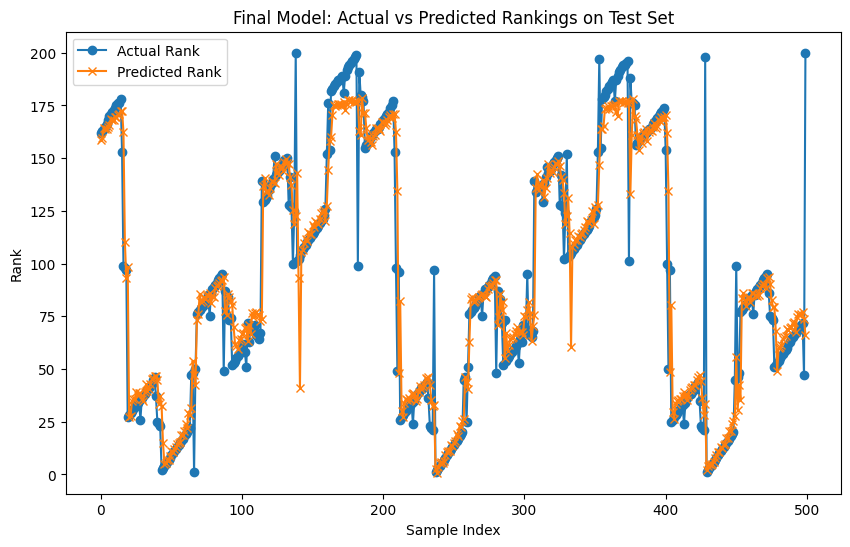

In [19]:
import matplotlib.pyplot as plt

# Make predictions on the test set
test_predictions = model.predict(X_test)  # Replace 'X' with your test data 'test_X'


# Compare predicted and actual rankings on the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.reshape(-1, 1), label='Actual Rank', marker='o')  # Actual rankings (first 100 data points)
plt.plot(test_predictions, label='Predicted Rank', marker='x')  # Predicted rankings (first 100 data points)
plt.xlabel('Sample Index')
plt.ylabel('Rank')
plt.title('Final Model: Actual vs Predicted Rankings on Test Set')
plt.legend()
plt.show()

# 5. 모델 성능 및 평가

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error (MSE) and Mean Absolute Error (MAE)
mse = mean_squared_error(y_test.reshape(-1, 1), test_predictions)
mae = mean_absolute_error(y_test.reshape(-1, 1), test_predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 353.595573891989
Root Mean Squared Error (RMSE): 18.804137148297684
Mean Absolute Error (MAE): 9.3365430727005
